**Street View**

In [0]:
# import packages
#import openml as oml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_validate 
import numpy as np
import pandas as pd
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

## 1. Evaluate different models (15 points)

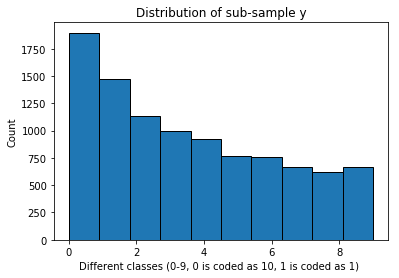

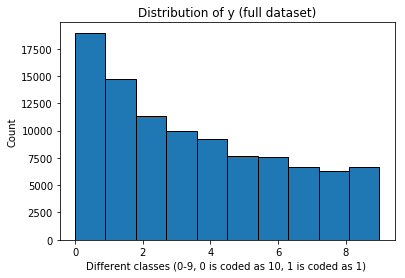

In [0]:
#Take a stratified 10% subsample of the data. 
#Plot the distribution of the classes (as a histogram) for both the original data and the subsample.

#Use train_test_split in a "clever" way to generate 10% stratified sub-sample:
X_90_percent, X_10_percent, y_90_percent, y_10_percent = train_test_split(X, y, test_size=0.1, stratify=y) 


plt.hist(y_10_percent, bins=10, histtype='bar', edgecolor='black')         #Histogram of Sub-sample
plt.title("Distribution of sub-sample y")
plt.xlabel("Different classes (0-9, 0 is coded as 10, 1 is coded as 1) ")
plt.ylabel("Count")
plt.show();

plt.hist(y, bins=10, histtype='bar', edgecolor='black')                    #Histogram of original data
plt.title("Distribution of y (full dataset)")
plt.xlabel("Different classes (0-9, 0 is coded as 10, 1 is coded as 1) ")
plt.ylabel("Count")
plt.show();

In [0]:
#Evaluate k-Nearest Neighbors, using default hyperparameter settings. Use cross-validation with 3 folds, 
#output the training accuracy and test accuracy including the standard deviations

#Initialize default knn classifier
knn = KNeighborsClassifier()

#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(knn, X_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds: [0.56695889 0.566853   0.57104031] 
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds: 0.001949440450662831
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds: [0.35194688 0.34833837 0.34361766]
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))      #std over 3 folds: 0.0034104761232712894

Training accuracy of models [0.56151753 0.5531047  0.55654537]
Standard deviation of training accuracies are 0.0034534428458641167
Testing accuracy of models [0.34349532 0.33927492 0.35148215]
Standard deviation of Training accuracies 0.005062033888471301


In [0]:
#Evaluate Logistic regression, using default hyperparameter settings. Use cross-validation with 3 folds, 
#output the training accuracy and test accuracy including the standard deviations

#Initialize default logistic regression 
#(it infers that we are using a multi-classifying problem instead of binary, as multi-class is set to auto by default)
logisticReg = LogisticRegression()

#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(logisticReg, X_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds: [0.75226723 0.74935791 0.73622226] 
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds: 0.006979738688354459
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds: [0.16752188 0.16616314 0.17906836]
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))      #std over 3 folds: 0.00578995276573481

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

Training accuracy of models [0.73473398 0.74074634 0.76506115]
Standard deviation of training accuracies are 0.013111047167566734
Testing accuracy of models [0.15725928 0.16344411 0.15668482]
Standard deviation of Training accuracies 0.0030599590356461034


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
#Evaluate Linear SVM, using default hyperparameter settings. Use cross-validation with 3 folds, 
#output the training accuracy and test accuracy including the standard deviations

#Initialize default linear support vector machine
svc = LinearSVC()

#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(svc, X_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds: [0.2028416  0.22541169 0.41869244]
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds: 0.09687244723712729
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds: [0.14941141 0.19365559 0.16333938]
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))      #std over 3 folds: 0.018471023013982568

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy of models [0.25483676 0.28750567 0.3410841 ]
Standard deviation of training accuracies are 0.03555357471789143
Testing accuracy of models [0.19740417 0.14410876 0.12220206]
Standard deviation of Training accuracies 0.0315799882585887


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 2. Learning curves (20 points)

In [0]:
import pandas as pd
# Import Dataset
streetview_data = pd.read_csv('https://www.openml.org/data/get_csv/19326077/svhn.csv')

# Separate the data with features and label
X = streetview_data.iloc[:,:-1].values # selecting all the records from all the fields except last field
y = streetview_data.iloc[:,3072].values # Selecting all the records from last fieldr

Training complete on 1% subsample of data
Training complete on 2% subsample of data
Training complete on 3% subsample of data
Training complete on 4% subsample of data
Training complete on 5% subsample of data
Training complete on 6% subsample of data
Training complete on 7% subsample of data
Training complete on 8% subsample of data


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Training complete on 9% subsample of data
Training complete on 10% subsample of data


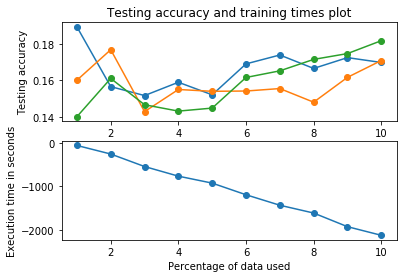

In [0]:
#Evaluate Logistic regression, using default hyperparameter settings. 
#Use cross-validation with 3 folds, output the training accuracy and test accuracy including the standard deviations

X_90_percent, X_10_percent, y_90_percent, y_10_percent = train_test_split(X, y, test_size=0.1, stratify=y, random_state=47)

logisticReg = LogisticRegression()

test_accuracy_list = []
test_accuracy_std_list = []
time_execution_list = []
training_percentages = [1,2,3,4,5,6,7,8,9,10]

for i in range(1,11):
    start = time.time()
    scores = cross_validate(logisticReg, X_10_percent[:i*992], y_10_percent[0:i*992], cv=3, scoring=['accuracy'], n_jobs=-1)
    test_accuracy_list.append(scores['test_accuracy'])
    test_accuracy_std_list.append(scores['test_accuracy'].std())
    stop = time.time()
    duration = start-stop
    time_execution_list.append(duration)
    print("Training complete on {}% subsample of data".format(i))


plt.subplot(2,1,1)
plt.plot(training_percentages, test_accuracy_list, '-o')
plt.title('Testing accuracy and training times plot')
plt.xlabel("Percentage of data used")
plt.ylabel("Testing accuracy")

plt.subplot(2,1,2)
plt.plot(training_percentages,time_execution_list , '-o')
plt.xlabel("Percentage of data used")
plt.ylabel("Execution time in seconds")
plt.show()

Training complete on 1% subsample of data
Training complete on 2% subsample of data
Training complete on 3% subsample of data
Training complete on 4% subsample of data
Training complete on 5% subsample of data
Training complete on 6% subsample of data
Training complete on 7% subsample of data
Training complete on 8% subsample of data
Training complete on 9% subsample of data


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Training complete on 10% subsample of data


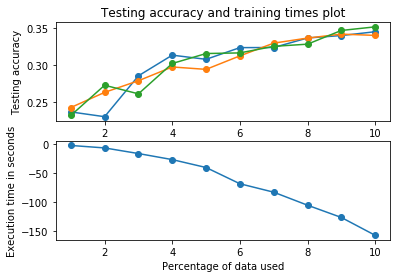

In [0]:
#Evaluate k-Nearest Neighbors, using default hyperparameter settings. Use cross-validation with 3 folds, 
#output the training accuracy and test accuracy including the standard deviations

knn = KNeighborsClassifier()
test_accuracy_list = []
test_accuracy_std_list = []
time_execution_list = []
training_percentages = [1,2,3,4,5,6,7,8,9,10]

for i in range(1,11):
    start = time.time()
    scores = cross_validate(knn, X_10_percent[:i*992], y_10_percent[0:i*992], cv=3, scoring=['accuracy'], n_jobs=-1)
    test_accuracy_list.append(scores['test_accuracy'])
    test_accuracy_std_list.append(scores['test_accuracy'].std())
    stop = time.time()
    duration = start-stop
    time_execution_list.append(duration)
    print("Training complete on {}% subsample of data".format(i))


plt.subplot(2,1,1)
plt.plot(training_percentages, test_accuracy_list, '-o')
plt.title('Testing accuracy and training times plot')
plt.xlabel("Percentage of data used")
plt.ylabel("Testing accuracy")

plt.subplot(2,1,2)
plt.plot(training_percentages,time_execution_list , '-o')
plt.xlabel("Percentage of data used")
plt.ylabel("Execution time in seconds")
plt.show()

Training complete on 1% subsample of data
Training complete on 2% subsample of data
Training complete on 3% subsample of data
Training complete on 4% subsample of data
Training complete on 5% subsample of data
Training complete on 6% subsample of data
Training complete on 7% subsample of data


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Training complete on 8% subsample of data
Training complete on 9% subsample of data
Training complete on 10% subsample of data


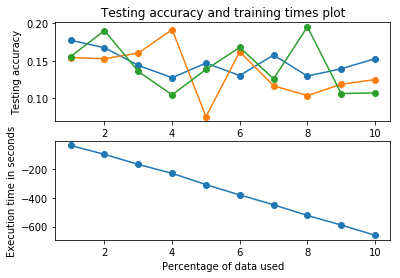

In [0]:
#Evaluate Linear SVM, using default hyperparameter settings. Use cross-validation with 3 folds, 
#output the training accuracy and test accuracy including the standard deviations

X_90_percent, X_10_percent, y_90_percent, y_10_percent = train_test_split(X, y, test_size=0.1, stratify=y, random_state=47)


svc = LinearSVC()

test_accuracy_list = []
test_accuracy_std_list = []
time_execution_list = []
training_percentages = [1,2,3,4,5,6,7,8,9,10]

for i in range(1,11):
    start = time.time()
    scores = cross_validate(svc, X_10_percent[:i*992], y_10_percent[0:i*992], cv=3, scoring=['accuracy'], n_jobs=-1)
    test_accuracy_list.append(scores['test_accuracy'])
    test_accuracy_std_list.append(scores['test_accuracy'].std())
    stop = time.time()
    duration = start-stop
    time_execution_list.append(duration)
    print("Training complete on {}% subsample of data".format(i))


plt.subplot(2,1,1)
plt.plot(training_percentages, test_accuracy_list, '-o')
plt.title('Testing accuracy and training times plot')
plt.xlabel("Percentage of data used")
plt.ylabel("Testing accuracy")

plt.subplot(2,1,2)
plt.plot(training_percentages,time_execution_list , '-o')
plt.xlabel("Percentage of data used")
plt.ylabel("Execution time in seconds")
plt.show()

- Discuss the results. Are they what you expected? Are the model over/underfitting? What does the standard deviation tell you? Do you think you can get better results with more training data?

## 3. Data representation (20 points) 

- Convert the images to grayscale (use the function below). Check whether the conversion is correct by plotting a few of the converted images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.


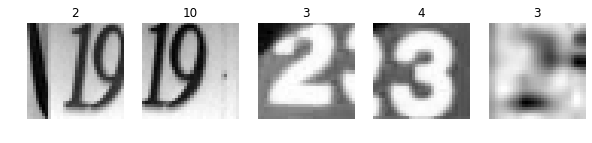

In [6]:
import numpy as np

def rgb2gray(X, dim=32):
    return np.squeeze(np.expand_dims(np.dot(X.reshape(len(X), dim * dim, 3), [0.2990, 0.5870, 0.1140]), axis=3))

X_gray = rgb2gray(X)

def plot_images(X, y):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    [ax.imshow(X[n].reshape(32, 32)/255, cmap='gray') for n,ax in enumerate(axes)]
    [ax.set_title((y[n]+1)) for n,ax in enumerate(axes)]
    [ax.axis('off') for ax in axes]
    plt.show()

plot_images(X_gray[0:5], y[0:5]) #Conversion is correct

- Is the grayscale representation better than the color representation? Does it yield better models? Why (not)? Run the necessary experiments and discuss. For instance, compare the performance of models trained on both representations.


|-------------------------------------------------------------------------------|







In [0]:
# To check the difference in performance, we compare the results of different models with the results obtained in question 1.
# Since results of Q1 were already obtained, we simply run the same models as we did in Q1, but now on the grayscale data.
# Alongside test accuracy we also generate the training accuracy and standard deviations again as they could provide us with
# Some useful insights about the training process.
# Also generate a new test split
X_gray_90_percent, X_gray_10_percent, y_90_percent, y_10_percent = train_test_split(X_gray, y, test_size=0.1, stratify=y, random_state=47)

In [0]:
#Initialize default knn classifier
knn = KNeighborsClassifier()
#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(knn, X_gray_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds: [0.58388755 0.58951503 0.58417636]
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds: 0.002587437567413254
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds: [0.38182916 0.37190332 0.37295826]
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))      #std over 3 folds: 0.004451316268125431

Training accuracy of models [0.58388755 0.58951503 0.58417636]
Standard deviation of training accuracies are 0.002587437567413254
Testing accuracy of models [0.38182916 0.37190332 0.37295826]
Standard deviation of Training accuracies 0.004451316268125431


In [0]:
#Initialize default support vector machine
svc = LinearSVC()
#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(svc, X_gray_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds: [0.20133011 0.12161958 0.26105994]
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds: 0.05712076503282101
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds: [0.13975249 0.08851964 0.13883848]
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))      #std over 3 folds: 0.023938871417926368

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy of models [0.21886336 0.15017374 0.27298807]
Standard deviation of training accuracies are 0.0502561302222925
Testing accuracy of models [0.19076366 0.08429003 0.15184513]
Standard deviation of Training accuracies 0.043988605644834984


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
#Initialize default logistic regression
logisticReg = LogisticRegression()
#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(logisticReg, X_gray_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds:
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds:
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds:
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))      #std over 3 folds:

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

Training accuracy of models [0.51647521 0.50536335 0.52272384]
Standard deviation of training accuracies are 0.0071794893845586565
Testing accuracy of models [0.16571084 0.16042296 0.16485178]
Standard deviation of Training accuracies 0.002316944266840829


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


- Afterwards, normalize the data by substracting the mean of the pixel values from every image and dividing by the standard deviation of every image.
  - Note: Do this for every image independently. Don't compute means or standard deviations over the entire training/test set
  - Again, check whether you have done it correctly by plotting some of the converted images.
  - Is the new representation better? Why (not)? Run the necessary experiments and discuss.

In [0]:
X_90_percent, X_10_percent, y_90_percent, y_10_percent = train_test_split(X, y, test_size=0.1, stratify=y, random_state=47)

#First we Normalize the entire X_gray data, 
def std_function(X_data):
    std_array = np.zeros(X_gray.shape)
    for counter, value in enumerate(X_10_percent):
        std_array[counter] = (X_data[counter] - np.mean(X_data[counter]))/ np.std(X_data[counter])
    return std_array

X_gray_std = std_function(X_gray)
np.save('Standardized grayscale array', X_gray_std)

#Generate new (Normalized, grayscaled), with same random_state so the split should be similar to the ones used before. 
X_gray_std_90_percent, X_gray_std_10_percent, y_90_percent, y_10_percent = train_test_split(X_gray_std, y, test_size=0.1, stratify=y, random_state=47)

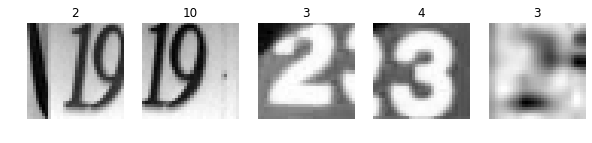

In [22]:
plot_images(X_gray_std[0:5], y[0:5])

In [10]:
#Initialize default knn classifier
knn = KNeighborsClassifier()

#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(knn, X_gray_std_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds: [0.22626965 0.22314549 0.22482259]
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds: 0.0012765845615265684
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds: [0.20464835 0.20151057 0.20205687]
print("Standard deviation of testing accuracies {}".format(scores['test_accuracy'].std()))       #std over 3 folds: 0.0013686943501351149

Training accuracy of models [0.22626965 0.22314549 0.22482259]
Standard deviation of training accuracies are 0.0012765845615265684
Testing accuracy of models [0.20464835 0.20151057 0.20205687]
Standard deviation of testing accuracies 0.0013686943501351149


In [11]:
#Initialize default linear support vector machine
svc = LinearSVC()

#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(svc, X_gray_std_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds: [0.27010278 0.26363499 0.26891137]
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds: 0.0028105349438494647
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds: [0.18442499 0.18126888 0.18602541]
print("Standard deviation of testing accuracies {}".format(scores['test_accuracy'].std()))       #std over 3 folds: 0.0019761608223900695

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy of models [0.27055623 0.26333283 0.26921335]
Standard deviation of training accuracies are 0.003136900231944167
Testing accuracy of models [0.18472683 0.18187311 0.18632789]
Standard deviation of testing accuracies 0.001842466435379235


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
#Initialize default logistic regression
logisticReg = LogisticRegression()

#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(logisticReg, X_gray_std_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds: [0.26647521 0.26227527 0.26725049]
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds: 0.0021856456454752266
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds: [0.18563236 0.181571   0.18663037]
print("Standard deviation of testing accuracies {}".format(scores['test_accuracy'].std()))       #std over 3 folds: 0.0021880463397819902

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Training accuracy of models [0.26647521 0.26227527 0.26725049]
Standard deviation of training accuracies are 0.0021856456454752266
Testing accuracy of models [0.18563236 0.181571   0.18663037]
Standard deviation of testing accuracies 0.0021880463397819902


- Finally, run PCA (Principal Component Analysis) on the data and see if that gives you a better (lower-dimensional) representation. Note that you need to use a pipeline here to avoid data leakage between your training and test set (see Tutorial 3).
  - Try different numbers of components or use a solver to guess the optimal number of components
  - Is the new representation better? Why (not)? Run the necessary experiments and discuss.

In [0]:
#Initialize default knn classifier
knn = KNeighborsClassifier()

#Create pipeline with PCA, and use a solver to guess optimal number of dimensions. 
pipeline= Pipeline([("PCA", PCA(n_components='mle', svd_solver='full')), ("knn", KNeighborsClassifier())])

scores = cross_validate(pipeline, X_gray_std_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)
print(pipeline.named_steps["PCA"].n_components_) #
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds:
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds:
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds:
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))      #std over 3 folds

In [70]:
#Initialize default linear support vector machine
svc = LinearSVC()
#("svm", LinearSVC())
#("logistigReg", LogisticRegression())
#("knn", "KNeighborsClassifier())

#Create pipeline with PCA, and use a solver to guess optimal number of dimensions. 
pipeline= Pipeline([("PCA", PCA(n_components='mle', svd_solver='full')), ("svm", LinearSVC())])

scores = cross_validate(pipeline, X_gray_std_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

print(pipeline.named_steps["PCA"].n_components_) #
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds:
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds:
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds:
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))      #std over 3 folds:

AttributeError: ignored

In [0]:
#Initialize default logistic regression
logisticReg = LogisticRegression()

#Create pipeline with PCA, and use a solver to guess optimal number of dimensions. 
pipeline= Pipeline([("PCA", PCA(n_components='mle', svd_solver='full')), ("logistigReg", LogisticRegression())])

scores = cross_validate(pipeline, X_gray_std_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

print(pipeline.named_steps["PCA"].n_components_) #
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds:
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds:
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds:
print("Standard deviation of Training accuracies {}".format(scores['test_accuracy'].std()))      #std over 3 folds:

## 4. Regularization (20 points) {-}

- Tune the algorithm's main regularization hyperparameter on the 10% stratified subsample using the normalized grayscale representation. These are the misclassification cost in SVMs (C), the regularization parameter in logistic regression (C), and the number of neighbors (n_neighbors) in kNN.

- We expect the optimum for the C parameters to lie in $[10^{-12},10^{12}] and for n_neighbors between 1 and 50. C should be varied logarithmically, n_neighbors linearly.
- Run a grid search over these ranges, using 3-fold cross-valdation, and plot both the training and test error. Start with a coarse grid (e.g. 5 values per hyperparameter), use a finer grid for the 'interesting' regions (where performance changes) if training time allows.
- Plot the effect of every one of the hyperparameters (both the training and test score). Discuss the plots. For which values is the model over/underfitting? Is there a sweet spot?
- Evaluate the optimized models (the best hyperparameter settings) on the rest of the (unseen) data and discuss your findings. Do the results generalize? If not, what can/ should you do? Discuss. Run additional experiments if it helps you confirm your claims.

In [0]:
#Initialize knn classifier
knn = KNeighborsClassifier(n_neighbors)

#Use cross_validate with regular CV (As sample is already stratified, and we were not asked to use StratifiedKfold)
scores = cross_validate(knn, X_gray_std_10_percent, y_10_percent, cv=3, scoring=['accuracy'], return_train_score=True)

#Report training accuracy + std, testing accuracy + std
print("Training accuracy of models {}".format(scores['train_accuracy']))            #Training accuracy for 3 folds: [0.22626965 0.22314549 0.22482259]
print("Standard deviation of training accuracies are {}".format(scores['train_accuracy'].std())) #std over 3 folds: 0.0012765845615265684
print("Testing accuracy of models {}".format(scores['test_accuracy']))               #Testing accuracy for 3 folds: [0.20464835 0.20151057 0.20205687]

print("Standard deviation of testing accuracies {}".format(scores['test_accuracy'].std()))       #std over 3 folds: 0.0013686943501351149

In [58]:
import warnings
warnings.filterwarnings('ignore')

#Generate new (Normalized, grayscaled), with same random_state so the split should be similar to the ones used before. 
X_gray_std_90_percent, X_gray_std_10_percent, y_90_percent, y_10_percent = train_test_split(X_gray_std, y, test_size=0.1, stratify=y, random_state=47)

X_gray_train, X_gray_test, y_gray_train, y_gray_test = train_test_split(X_gray_std_10_percent, y_10_percent, test_size=0.3, stratify=y_10_percent, random_state=47)


# Set the parameters by cross-validation
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

svc = LinearSVC()

clf = GridSearchCV(svc, tuned_parameters, cv=3, scoring='f1_macro')
clf.fit(X_gray_train, y_gray_train)

print(clf.best_params_)

{'C': 1}


In [63]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print("Detailed classification report:")
    y_true, y_pred = y_gray_test, clf.predict(X_gray_test)
    print(classification_report(y_true, y_pred))

0.049 (+/-0.004) for {'C': 1}
Detailed classification report:
              precision    recall  f1-score   support

           1       0.19      0.93      0.32       569
           2       0.26      0.02      0.05       442
           3       0.05      0.01      0.01       342
           4       0.24      0.02      0.04       299
           5       0.14      0.01      0.02       278
           6       0.00      0.00      0.00       231
           7       0.27      0.02      0.03       228
           8       0.09      0.01      0.02       201
           9       0.00      0.00      0.00       188
          10       0.07      0.00      0.01       201

    accuracy                           0.19      2979
   macro avg       0.13      0.10      0.05      2979
weighted avg       0.15      0.19      0.08      2979

0.048 (+/-0.005) for {'C': 10}
Detailed classification report:
              precision    recall  f1-score   support

           1       0.19      0.93      0.32       569
       

In [64]:
logisticReg = LogisticRegression()

import warnings
warnings.filterwarnings('ignore')

# Set the parameters by cross-validation
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(logisticReg, tuned_parameters, cv=3, scoring='f1_macro')
clf.fit(X_gray_train, y_gray_train)

print(clf.best_params_)

{'C': 1}


In [67]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print("Detailed classification report:")
    y_true, y_pred = y_gray_test, clf.predict(X_gray_test)
    print(classification_report(y_true, y_pred))

0.050 (+/-0.005) for {'C': 1}
Detailed classification report:
              precision    recall  f1-score   support

           1       0.19      0.93      0.32       569
           2       0.23      0.02      0.04       442
           3       0.08      0.01      0.02       342
           4       0.35      0.03      0.05       299
           5       0.11      0.01      0.02       278
           6       0.00      0.00      0.00       231
           7       0.25      0.03      0.05       228
           8       0.06      0.00      0.01       201
           9       0.00      0.00      0.00       188
          10       0.12      0.01      0.02       201

    accuracy                           0.19      2979
   macro avg       0.14      0.10      0.05      2979
weighted avg       0.16      0.19      0.08      2979

0.048 (+/-0.006) for {'C': 10}
Detailed classification report:
              precision    recall  f1-score   support

           1       0.19      0.93      0.32       569
       

In [66]:
import warnings
warnings.filterwarnings('ignore')

grid_params = {'n_neighbors': [3,5,11,19]}

gs_clf = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

gs_clf.fit(X_gray_train, y_gray_train)

print(gs_clf.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.8min finished


{'n_neighbors': 5}


In [69]:
means = gs_clf.cv_results_['mean_test_score']
stds = gs_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print("Detailed classification report:")
    y_true, y_pred = y_gray_test, gs_clf.predict(X_gray_test)
    print(classification_report(y_true, y_pred))

0.144 (+/-0.084) for {'n_neighbors': 3}
Detailed classification report:
              precision    recall  f1-score   support

           1       0.20      0.99      0.33       569
           2       0.36      0.04      0.07       442
           3       0.22      0.02      0.03       342
           4       0.71      0.03      0.06       299
           5       0.36      0.01      0.03       278
           6       0.12      0.01      0.02       231
           7       0.33      0.00      0.01       228
           8       0.04      0.00      0.01       201
           9       0.14      0.01      0.01       188
          10       0.54      0.03      0.07       201

    accuracy                           0.20      2979
   macro avg       0.30      0.11      0.06      2979
weighted avg       0.31      0.20      0.09      2979

0.201 (+/-0.007) for {'n_neighbors': 5}
Detailed classification report:
              precision    recall  f1-score   support

           1       0.20      0.99      0.3